# 데이터 불러오기

In [ ]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [ ]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [ ]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [ ]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [ ]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [ ]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 중식음식점

In [ ]:
# 중식음식점만 남기기
ap_jungsik = df_ap_quarter[df_ap_quarter.업종명 == '중식음식점'].reset_index().drop('index', axis=1)
ap_jungsik

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,외식,식사류,중식음식점,압구정동,3133573419,35,0,1
1,2017-2,외식,식사류,중식음식점,압구정동,2810538991,33,1,3
2,2017-3,외식,식사류,중식음식점,압구정동,2786128889,32,1,2
3,2017-4,외식,식사류,중식음식점,압구정동,2730474578,35,4,1
4,2018-1,외식,식사류,중식음식점,압구정동,2624546179,33,0,2
5,2018-2,외식,식사류,중식음식점,압구정동,2650085992,34,2,1
6,2018-3,외식,식사류,중식음식점,압구정동,2718379929,35,2,1
7,2018-4,외식,식사류,중식음식점,압구정동,3117817082,35,1,1
8,2019-1,외식,식사류,중식음식점,압구정동,2686517708,35,0,0
9,2019-2,외식,식사류,중식음식점,압구정동,2578742751,38,4,1


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [ ]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_jungsik['성장성'] = ap_jungsik['분기당_매출_금액'] / ap_jungsik['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_jungsik['성장성'][0] = 1

ap_jungsik

<ipython-input-12-6fcc72eb6508>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_jungsik['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,외식,식사류,중식음식점,압구정동,3133573419,35,0,1,1.000000
1,2017-2,외식,식사류,중식음식점,압구정동,2810538991,33,1,3,0.896912
2,2017-3,외식,식사류,중식음식점,압구정동,2786128889,32,1,2,0.991315
3,2017-4,외식,식사류,중식음식점,압구정동,2730474578,35,4,1,0.980025
4,2018-1,외식,식사류,중식음식점,압구정동,2624546179,33,0,2,0.961205
5,2018-2,외식,식사류,중식음식점,압구정동,2650085992,34,2,1,1.009731
6,2018-3,외식,식사류,중식음식점,압구정동,2718379929,35,2,1,1.025770
7,2018-4,외식,식사류,중식음식점,압구정동,3117817082,35,1,1,1.146939
8,2019-1,외식,식사류,중식음식점,압구정동,2686517708,35,0,0,0.861666
9,2019-2,외식,식사류,중식음식점,압구정동,2578742751,38,4,1,0.959883


In [ ]:
# 개업률, 폐업률, 순점포증감률 추가

ap_jungsik['개업률'] = (ap_jungsik['개업점포수'] / ap_jungsik['총 점포수']) * 100
ap_jungsik['폐업률'] = (ap_jungsik['폐업점포수'] / ap_jungsik['총 점포수']) * 100
ap_jungsik['순점포증감률'] = ((ap_jungsik['개업점포수'] - ap_jungsik['폐업점포수']) / ap_jungsik['총 점포수']) * 100

ap_jungsik

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,외식,식사류,중식음식점,압구정동,3133573419,35,0,1,1.000000,0.000000,2.857143,-2.857143
1,2017-2,외식,식사류,중식음식점,압구정동,2810538991,33,1,3,0.896912,3.030303,9.090909,-6.060606
2,2017-3,외식,식사류,중식음식점,압구정동,2786128889,32,1,2,0.991315,3.125000,6.250000,-3.125000
3,2017-4,외식,식사류,중식음식점,압구정동,2730474578,35,4,1,0.980025,11.428571,2.857143,8.571429
4,2018-1,외식,식사류,중식음식점,압구정동,2624546179,33,0,2,0.961205,0.000000,6.060606,-6.060606
5,2018-2,외식,식사류,중식음식점,압구정동,2650085992,34,2,1,1.009731,5.882353,2.941176,2.941176
6,2018-3,외식,식사류,중식음식점,압구정동,2718379929,35,2,1,1.025770,5.714286,2.857143,2.857143
7,2018-4,외식,식사류,중식음식점,압구정동,3117817082,35,1,1,1.146939,2.857143,2.857143,0.000000
8,2019-1,외식,식사류,중식음식점,압구정동,2686517708,35,0,0,0.861666,0.000000,0.000000,0.000000
9,2019-2,외식,식사류,중식음식점,압구정동,2578742751,38,4,1,0.959883,10.526316,2.631579,7.894737


In [ ]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 중식음식점만 남기기
gangnam_jungsik = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '중식음식점'].reset_index()

################################################################################################################################################################################################

ap_jungsik['시장성'] = (ap_jungsik['분기당_매출_금액'] / ap_jungsik['총 점포수']) - (gangnam_jungsik['분기당_매출_금액'] / gangnam_jungsik['총 점포수'])

ap_jungsik = ap_jungsik[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_jungsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,중식음식점,3133573419,1.000000,-2.857143,-3.489017e+07
1,2017-2,중식음식점,2810538991,0.896912,-6.060606,-2.715398e+07
2,2017-3,중식음식점,2786128889,0.991315,-3.125000,-3.059596e+07
3,2017-4,중식음식점,2730474578,0.980025,8.571429,-4.963760e+07
4,2018-1,중식음식점,2624546179,0.961205,-6.060606,-4.979102e+07
5,2018-2,중식음식점,2650085992,1.009731,2.941176,-4.819539e+07
6,2018-3,중식음식점,2718379929,1.025770,2.857143,-5.101986e+07
7,2018-4,중식음식점,3117817082,1.146939,0.000000,-4.908531e+07
8,2019-1,중식음식점,2686517708,0.861666,0.000000,-3.510471e+07
9,2019-2,중식음식점,2578742751,0.959883,7.894737,-2.999183e+07


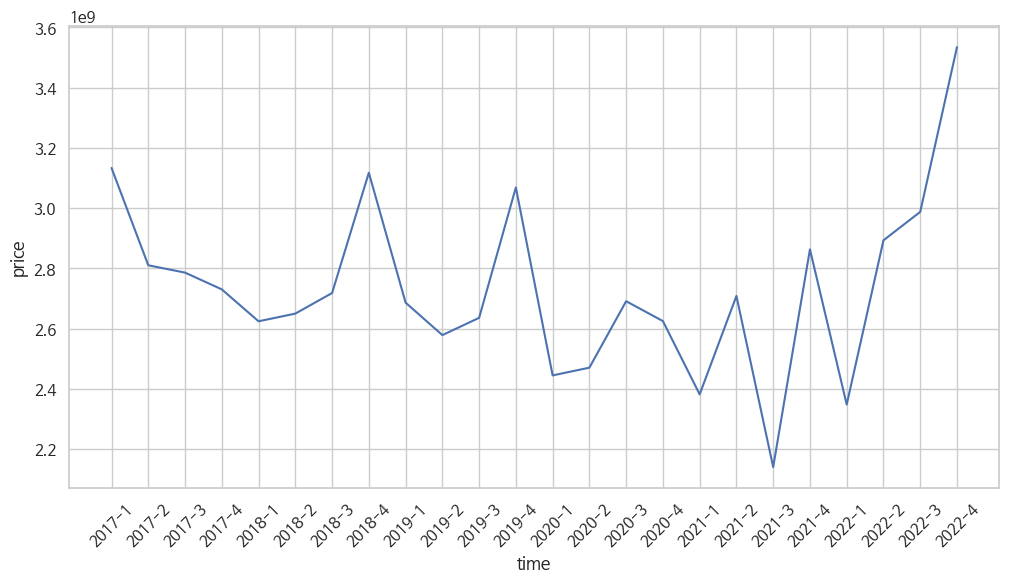

In [ ]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_jungsik['분기'], y=ap_jungsik['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [ ]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_jungsik[['성장성', '시장성', '순점포증감률']]
y = ap_jungsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.489017e+07 -2.857143
1   0.896912 -2.715398e+07 -6.060606
2   0.991315 -3.059596e+07 -3.125000
3   0.980025 -4.963760e+07  8.571429
4   0.961205 -4.979102e+07 -6.060606
5   1.009731 -4.819539e+07  2.941176
6   1.025770 -5.101986e+07  2.857143
7   1.146939 -4.908531e+07  0.000000
8   0.861666 -3.510471e+07  0.000000
9   0.959883 -2.999183e+07  7.894737
10  1.022213 -3.564022e+07  0.000000
11  1.164200 -3.981870e+07  9.523810
12  0.796698 -4.445375e+07  2.173913
13  1.010488 -4.229707e+07 -4.545455
14  1.089298 -4.487434e+07 -4.761905
15  0.975489 -5.400308e+07  2.272727
16  0.907314 -5.145740e+07 -2.380952
17  1.137195 -5.602270e+07  2.325581
18  0.790238 -5.020289e+07  0.000000
19  1.337691 -5.906330e+07  0.000000
20  0.820116 -5.378665e+07  0.000000
21  1.232096 -6.674799e+07  2.222222
22  1.032638 -6.998541e+07  0.000000
23  1.183070 -6.527598e+07 -2.325581
---------------------------------------------------------------------------

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [ ]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [ ]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.44277719 0.         0.38888889]
 [0.71756338 0.10995252 0.23966408]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2453
Epoch 1: val_loss improved from inf to 0.12219, saving model to stock_model.h5
1/1 [==============================] - 13s 13s/step - loss: 0.2453 - val_loss: 0.1222
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2441
Epoch 2: val_loss improved from 0.12219 to 0.12147, saving model to stock_model.h5
1/1 [==============================] - 0s 250ms/step - loss: 0.2441 - val_loss: 0.1215
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2429
Epoch 3: val_loss improved from 0.12147 to 0.12076, saving model to stock_model.h5
1/1 [==============================] - 0s 185ms/step - loss: 0.2429 - val_loss: 0.1208
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2418
Epoch 4: val_loss improved from 0.12076 to 0.12005, saving model to stock_model.h5
1/1 [==============================] - 0s 263ms/step - loss: 0.2418 - val_loss: 0.1200
Epoch 5/300
1/1 [============

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 665ms/step
[[0.24694383]
 [0.2621084 ]
 [0.23684996]
 [0.24371769]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.149021,0.246944
2022-2,0.539949,0.262108
2022-3,0.607681,0.236850
2022-4,1.000000,0.243718


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_jungsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.149021,0.246944,2348296371,2.484820e+09,-1.365239e+08
2022-2,0.539949,0.262108,2893327647,2.505962e+09,3.873652e+08
2022-3,0.607681,0.236850,2987758950,2.470747e+09,5.170116e+08
2022-4,1.000000,0.243718,3534728361,2.480322e+09,1.054406e+09


In [ ]:
df_test = df_test.reset_index()

### 결과

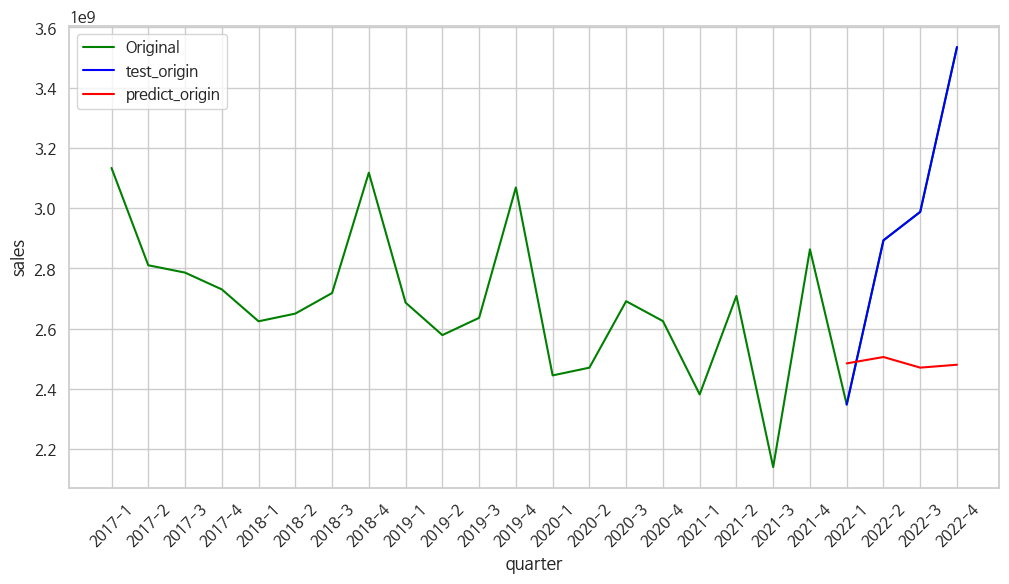

In [ ]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.555647e+08
std      4.890831e+08
min     -1.365239e+08
25%      2.563929e+08
50%      4.521884e+08
75%      6.513602e+08
max      1.054406e+09
dtype: float64

In [ ]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 29ms/step
[[0.21219572]]
--------------------------------------------------------------------------------
예측된 매출  : 2436374528.0 


## 23년 1분기 성장성 예측

In [ ]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_jungsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_jungsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성    순점포증감률
0   3133573419 -3.489017e+07 -2.857143
1   2810538991 -2.715398e+07 -6.060606
2   2786128889 -3.059596e+07 -3.125000
3   2730474578 -4.963760e+07  8.571429
4   2624546179 -4.979102e+07 -6.060606
5   2650085992 -4.819539e+07  2.941176
6   2718379929 -5.101986e+07  2.857143
7   3117817082 -4.908531e+07  0.000000
8   2686517708 -3.510471e+07  0.000000
9   2578742751 -2.999183e+07  7.894737
10  2636024748 -3.564022e+07  0.000000
11  3068860309 -3.981870e+07  9.523810
12  2444955670 -4.445375e+07  2.173913
13  2470598217 -4.229707e+07 -4.545455
14  2691218735 -4.487434e+07 -4.761905
15  2625254103 -5.400308e+07  2.272727
16  2381930315 -5.145740e+07 -2.380952
17  2708718467 -5.602270e+07  2.325581
18  2140532050 -5.020289e+07  0.000000
19  2863370225 -5.906330e+07  0.000000
20  2348296371 -5.378665e+07  0.000000
21  2893327647 -6.674799e+07  2.222222
22  2987758950 -6.998541e+07  0.000000
23  3534728361 -6.527598e+07 -2.325581
-------------------------

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [ ]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.60768121 0.         0.38888889]
 [1.         0.10995252 0.23966408]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2182
Epoch 1: val_loss improved from inf to 0.27371, saving model to stock_model.h5
1/1 [==============================] - 6s 6s/step - loss: 0.2182 - val_loss: 0.2737
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2171
Epoch 2: val_loss improved from 0.27371 to 0.27278, saving model to stock_model.h5
1/1 [==============================] - 0s 100ms/step - loss: 0.2171 - val_loss: 0.2728
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2160
Epoch 3: val_loss improved from 0.27278 to 0.27185, saving model to stock_model.h5
1/1 [==============================] - 0s 114ms/step - loss: 0.2160 - val_loss: 0.2719
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2149
Epoch 4: val_loss improved from 0.27185 to 0.27093, saving model to stock_model.h5
1/1 [==============================] - 0s 120ms/step - loss: 0.2149 - val_loss: 0.2709
Epoch 5/300
1/1 [==============

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 964ms/step
[[0.30882868]
 [0.32353613]
 [0.3146106 ]
 [0.32469958]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.054577,0.308829
2022-2,0.807117,0.323536
2022-3,0.442777,0.314611
2022-4,0.717563,0.324700


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 3].values       # 성장성이 ap_jungsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.054577,0.308829,0.820116,0.959307,-0.139191
2022-2,0.807117,0.323536,1.232096,0.967359,0.264738
2022-3,0.442777,0.314611,1.032638,0.962472,0.070165
2022-4,0.717563,0.324700,1.183070,0.967996,0.215074


### 결과

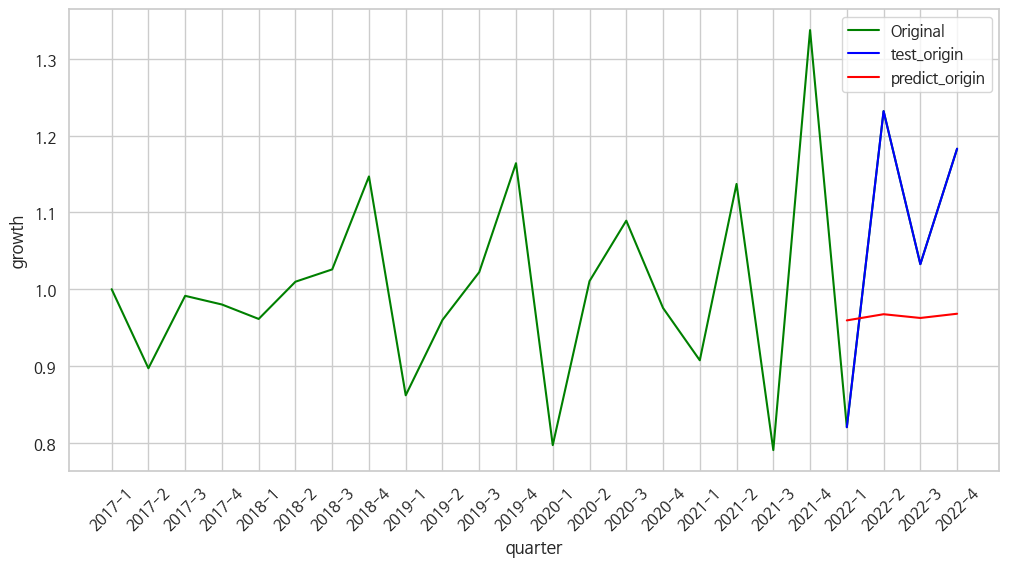

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [ ]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.102697
std      0.181157
min     -0.139191
25%      0.017826
50%      0.142620
75%      0.227490
max      0.264738
dtype: float64

In [ ]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 34ms/step
[[0.31678164]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9636610150337219 


## 23년 1분기 시장성 예측

In [ ]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_jungsik[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_jungsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액    순점포증감률
0   1.000000  3133573419 -2.857143
1   0.896912  2810538991 -6.060606
2   0.991315  2786128889 -3.125000
3   0.980025  2730474578  8.571429
4   0.961205  2624546179 -6.060606
5   1.009731  2650085992  2.941176
6   1.025770  2718379929  2.857143
7   1.146939  3117817082  0.000000
8   0.861666  2686517708  0.000000
9   0.959883  2578742751  7.894737
10  1.022213  2636024748  0.000000
11  1.164200  3068860309  9.523810
12  0.796698  2444955670  2.173913
13  1.010488  2470598217 -4.545455
14  1.089298  2691218735 -4.761905
15  0.975489  2625254103  2.272727
16  0.907314  2381930315 -2.380952
17  1.137195  2708718467  2.325581
18  0.790238  2140532050  0.000000
19  1.337691  2863370225  0.000000
20  0.820116  2348296371  0.000000
21  1.232096  2893327647  2.222222
22  1.032638  2987758950  0.000000
23  1.183070  3534728361 -2.325581
--------------------------------------------------------------------------------
             시장성
0  -3.489017e+07
1  -2.7153

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [ ]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.44277719 0.60768121 0.38888889]
 [0.71756338 1.         0.23966408]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.5003
Epoch 1: val_loss improved from inf to 0.24746, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.5003 - val_loss: 0.2475
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4988
Epoch 2: val_loss improved from 0.24746 to 0.24643, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.4988 - val_loss: 0.2464
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4973
Epoch 3: val_loss improved from 0.24643 to 0.24540, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.4973 - val_loss: 0.2454
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4958
Epoch 4: val_loss improved from 0.24540 to 0.24438, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.4958 - val_loss: 0.2444
Epoch 5/300
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 622ms/step
[[0.39431584]
 [0.5199282 ]
 [0.42180163]
 [0.5792277 ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.378198,0.394316
2022-2,0.075585,0.519928
2022-3,0.000000,0.421802
2022-4,0.109953,0.579228


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 5].values       # 시장성이 ap_jungsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.378198,0.394316,-5.378665e+07,-53096300.0,-6.903534e+05
2022-2,0.075585,0.519928,-6.674799e+07,-47716140.0,-1.903185e+07
2022-3,0.000000,0.421802,-6.998541e+07,-51919040.0,-1.806637e+07
2022-4,0.109953,0.579228,-6.527598e+07,-45176260.0,-2.009972e+07


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


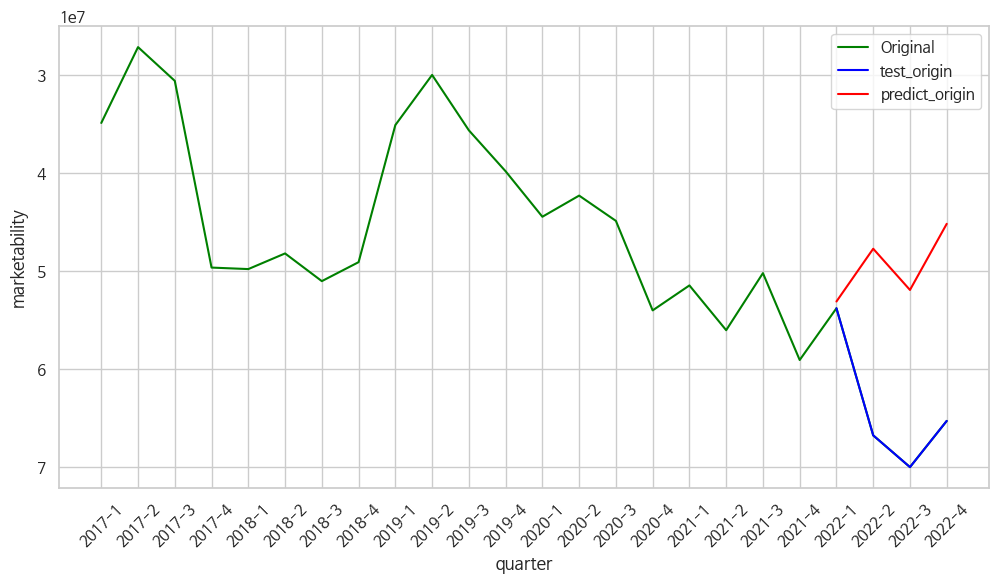

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.447207e+07
std      9.225269e+06
min     -2.009972e+07
25%     -1.929882e+07
50%     -1.854911e+07
75%     -1.372236e+07
max     -6.903534e+05
dtype: float64

In [ ]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.5298486]]
--------------------------------------------------------------------------------
예측된 시장성  : -47291240.0 


## 23년 1분기 순점포증감률 예측

In [ ]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_jungsik[['성장성', '분기당_매출_금액', '시장성']]
y = ap_jungsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  3133573419 -3.489017e+07
1   0.896912  2810538991 -2.715398e+07
2   0.991315  2786128889 -3.059596e+07
3   0.980025  2730474578 -4.963760e+07
4   0.961205  2624546179 -4.979102e+07
5   1.009731  2650085992 -4.819539e+07
6   1.025770  2718379929 -5.101986e+07
7   1.146939  3117817082 -4.908531e+07
8   0.861666  2686517708 -3.510471e+07
9   0.959883  2578742751 -2.999183e+07
10  1.022213  2636024748 -3.564022e+07
11  1.164200  3068860309 -3.981870e+07
12  0.796698  2444955670 -4.445375e+07
13  1.010488  2470598217 -4.229707e+07
14  1.089298  2691218735 -4.487434e+07
15  0.975489  2625254103 -5.400308e+07
16  0.907314  2381930315 -5.145740e+07
17  1.137195  2708718467 -5.602270e+07
18  0.790238  2140532050 -5.020289e+07
19  1.337691  2863370225 -5.906330e+07
20  0.820116  2348296371 -5.378665e+07
21  1.232096  2893327647 -6.674799e+07
22  1.032638  2987758950 -6.998541e+07
23  1.183070  3534728361 -6.527598e+07
-------------------------

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [ ]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.44277719 0.60768121 0.        ]
 [0.71756338 1.         0.10995252]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4127
Epoch 1: val_loss improved from inf to 0.16831, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4127 - val_loss: 0.1683
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4113
Epoch 2: val_loss improved from 0.16831 to 0.16748, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.4113 - val_loss: 0.1675
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4099
Epoch 3: val_loss improved from 0.16748 to 0.16665, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.4099 - val_loss: 0.1666
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4085
Epoch 4: val_loss improved from 0.16665 to 0.16582, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.4085 - val_loss: 0.1658
Epoch 5/300
1/1 [===============

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 943ms/step
[[0.2844784 ]
 [0.3148912 ]
 [0.26017934]
 [0.2643997 ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.388889,0.284478
2022-2,0.531481,0.314891
2022-3,0.388889,0.260179
2022-4,0.239664,0.264400


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_jungsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.388889,0.284478,0.000000,-1.627177,1.627177
2022-2,0.531481,0.314891,2.222222,-1.153211,3.375433
2022-3,0.388889,0.260179,0.000000,-2.005863,2.005863
2022-4,0.239664,0.264400,-2.325581,-1.940091,-0.385490


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


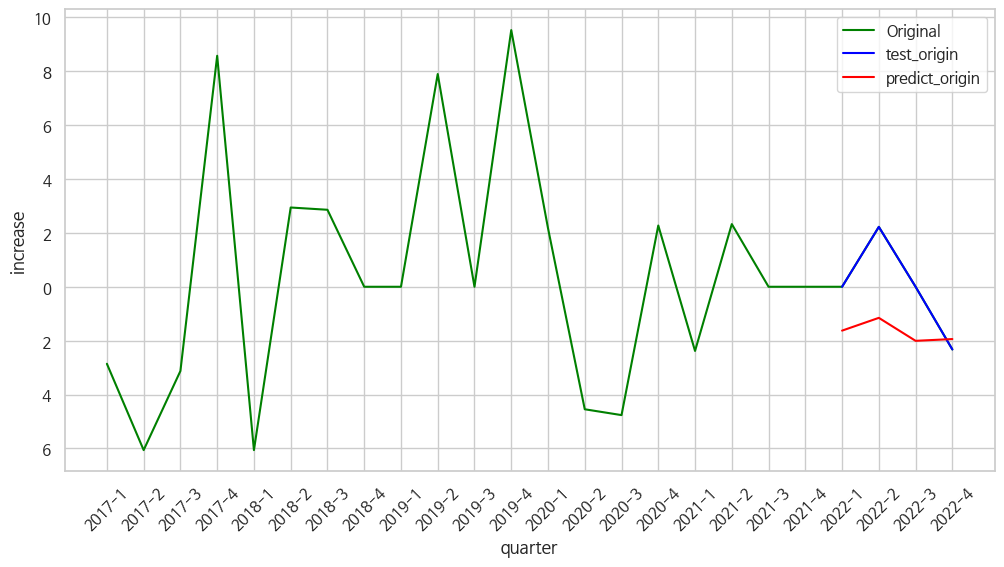

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.655746
std      1.554281
min     -0.385490
25%      1.124010
50%      1.816520
75%      2.348256
max      3.375433
dtype: float64

In [ ]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 37ms/step
[[0.25486934]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.088616371154785 


## 원본 데이터에 예측값 추가하기

In [ ]:
print(sales)
print(growth)
print(marketability)
print(increase)

2436374500.0
0.963661
-47291240.0
-2.0886164


In [ ]:
ap_jungsik.loc[24] = ['2023-1', '중식음식점', sales, growth, increase, marketability]

<ipython-input-71-166cf9877340>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_jungsik.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [ ]:
ap_jungsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,중식음식점,3.133573e+09,1.000000,-2.857143,-3.489017e+07
1,2017-2,중식음식점,2.810539e+09,0.896912,-6.060606,-2.715398e+07
2,2017-3,중식음식점,2.786129e+09,0.991315,-3.125000,-3.059596e+07
3,2017-4,중식음식점,2.730475e+09,0.980025,8.571429,-4.963760e+07
4,2018-1,중식음식점,2.624546e+09,0.961205,-6.060606,-4.979102e+07
5,2018-2,중식음식점,2.650086e+09,1.009731,2.941176,-4.819539e+07
6,2018-3,중식음식점,2.718380e+09,1.025770,2.857143,-5.101986e+07
7,2018-4,중식음식점,3.117817e+09,1.146939,0.000000,-4.908531e+07
8,2019-1,중식음식점,2.686518e+09,0.861666,0.000000,-3.510471e+07
9,2019-2,중식음식점,2.578743e+09,0.959883,7.894737,-2.999183e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['성장성', '시장성', '순점포증감률']]
y = ap_jungsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.489017e+07 -2.857143
1   0.896912 -2.715398e+07 -6.060606
2   0.991315 -3.059596e+07 -3.125000
3   0.980025 -4.963760e+07  8.571429
4   0.961205 -4.979102e+07 -6.060606
5   1.009731 -4.819539e+07  2.941176
6   1.025770 -5.101986e+07  2.857143
7   1.146939 -4.908531e+07  0.000000
8   0.861666 -3.510471e+07  0.000000
9   0.959883 -2.999183e+07  7.894737
10  1.022213 -3.564022e+07  0.000000
11  1.164200 -3.981870e+07  9.523810
12  0.796698 -4.445375e+07  2.173913
13  1.010488 -4.229707e+07 -4.545455
14  1.089298 -4.487434e+07 -4.761905
15  0.975489 -5.400308e+07  2.272727
16  0.907314 -5.145740e+07 -2.380952
17  1.137195 -5.602270e+07  2.325581
18  0.790238 -5.020289e+07  0.000000
19  1.337691 -5.906330e+07  0.000000
20  0.820116 -5.378665e+07  0.000000
21  1.232096 -6.674799e+07  2.222222
22  1.032638 -6.998541e+07  0.000000
23  1.183070 -6.527598e+07 -2.325581
24  0.963661 -4.729124e+07 -2.088616
--------------------------------------

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.71756338 0.10995252 0.23966408]
 [0.31678172 0.52984849 0.25486934]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2290
Epoch 1: val_loss improved from inf to 0.11762, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2290 - val_loss: 0.1176
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2279
Epoch 2: val_loss improved from 0.11762 to 0.11695, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2279 - val_loss: 0.1170
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2268
Epoch 3: val_loss improved from 0.11695 to 0.11628, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2268 - val_loss: 0.1163
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2256
Epoch 4: val_loss improved from 0.11628 to 0.11561, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2256 - val_loss: 0.1156
Epoch 5/300
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 636ms/step
[[0.2726456 ]
 [0.24579233]
 [0.2530875 ]
 [0.22006023]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.539949,0.272646
2022-3,0.607681,0.245792
2022-4,1.000000,0.253087
2023-1,0.212196,0.220060


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_jungsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.539949,0.272646,2.893328e+09,2.520654e+09,3.726741e+08
2022-3,0.607681,0.245792,2.987759e+09,2.483215e+09,5.045441e+08
2022-4,1.000000,0.253087,3.534728e+09,2.493386e+09,1.041343e+09
2023-1,0.212196,0.220060,2.436375e+09,2.447339e+09,-1.096474e+07


In [ ]:
df_test = df_test.reset_index()

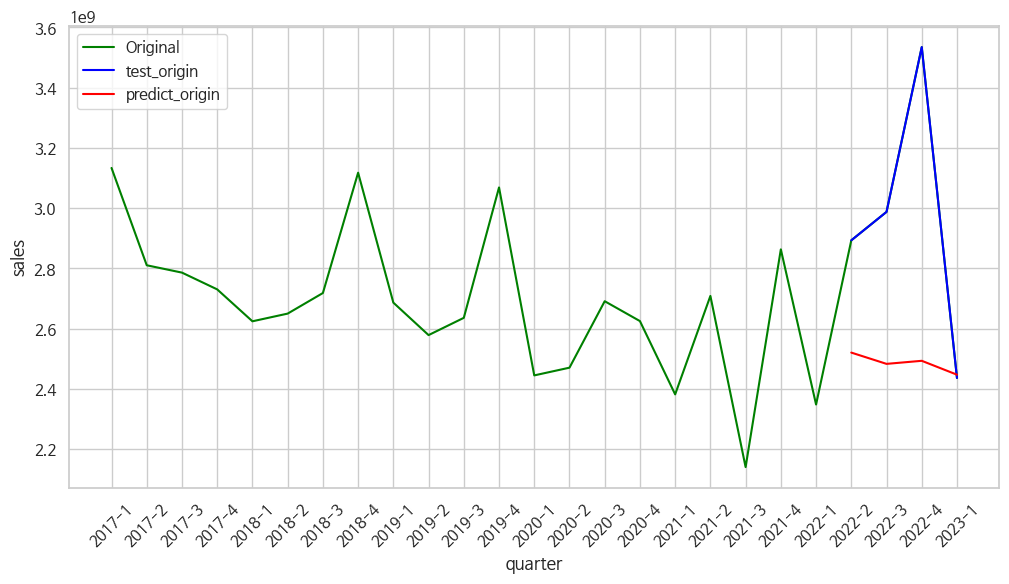

In [ ]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.768990e+08
std      4.352144e+08
min     -1.096474e+07
25%      2.767644e+08
50%      4.386091e+08
75%      6.387437e+08
max      1.041343e+09
dtype: float64

In [ ]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.23911825]]
--------------------------------------------------------------------------------
예측된 매출  : 2473909760.0 


### 성장성

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_jungsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   3.133573e+09 -3.489017e+07 -2.857143
1   2.810539e+09 -2.715398e+07 -6.060606
2   2.786129e+09 -3.059596e+07 -3.125000
3   2.730475e+09 -4.963760e+07  8.571429
4   2.624546e+09 -4.979102e+07 -6.060606
5   2.650086e+09 -4.819539e+07  2.941176
6   2.718380e+09 -5.101986e+07  2.857143
7   3.117817e+09 -4.908531e+07  0.000000
8   2.686518e+09 -3.510471e+07  0.000000
9   2.578743e+09 -2.999183e+07  7.894737
10  2.636025e+09 -3.564022e+07  0.000000
11  3.068860e+09 -3.981870e+07  9.523810
12  2.444956e+09 -4.445375e+07  2.173913
13  2.470598e+09 -4.229707e+07 -4.545455
14  2.691219e+09 -4.487434e+07 -4.761905
15  2.625254e+09 -5.400308e+07  2.272727
16  2.381930e+09 -5.145740e+07 -2.380952
17  2.708718e+09 -5.602270e+07  2.325581
18  2.140532e+09 -5.020289e+07  0.000000
19  2.863370e+09 -5.906330e+07  0.000000
20  2.348296e+09 -5.378665e+07  0.000000
21  2.893328e+09 -6.674799e+07  2.222222
22  2.987759e+09 -6.998541e+07  0.000000
23  3.534728e+09

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.10995252 0.23966408]
 [0.21219571 0.52984849 0.25486934]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1986
Epoch 1: val_loss improved from inf to 0.27410, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1986 - val_loss: 0.2741
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1976
Epoch 2: val_loss improved from 0.27410 to 0.27317, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.1976 - val_loss: 0.2732
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1966
Epoch 3: val_loss improved from 0.27317 to 0.27224, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.1966 - val_loss: 0.2722
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1955
Epoch 4: val_loss improved from 0.27224 to 0.27132, saving model to stock_model.h5
1/1 [==============================] - 0s 97ms/step - loss: 0.1955 - val_loss: 0.2713
Epoch 5/300
1/1 [===============

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 662ms/step
[[0.29207718]
 [0.28354174]
 [0.2927737 ]
 [0.2863436 ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.807117,0.292077
2022-3,0.442777,0.283542
2022-4,0.717563,0.292774
2023-1,0.316782,0.286344


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 3].values       # 성장성이 ap_jungsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.807117,0.292077,1.232096,0.950136,0.281960
2022-3,0.442777,0.283542,1.032638,0.945464,0.087174
2022-4,0.717563,0.292774,1.183070,0.950518,0.232552
2023-1,0.316782,0.286344,0.963661,0.946998,0.016663


In [ ]:
df_test = df_test.reset_index()

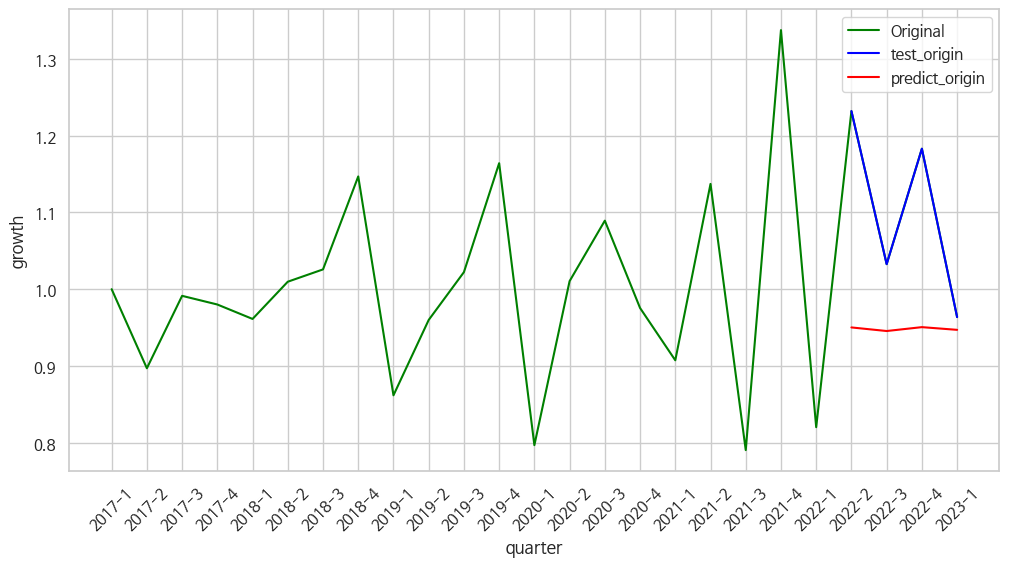

In [ ]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.154587
std      0.123653
min      0.016663
25%      0.069546
50%      0.159863
75%      0.244904
max      0.281960
dtype: float64

In [ ]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.3014724]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9552798271179199 


### 시장성

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_jungsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   3.133573e+09  1.000000 -2.857143
1   2.810539e+09  0.896912 -6.060606
2   2.786129e+09  0.991315 -3.125000
3   2.730475e+09  0.980025  8.571429
4   2.624546e+09  0.961205 -6.060606
5   2.650086e+09  1.009731  2.941176
6   2.718380e+09  1.025770  2.857143
7   3.117817e+09  1.146939  0.000000
8   2.686518e+09  0.861666  0.000000
9   2.578743e+09  0.959883  7.894737
10  2.636025e+09  1.022213  0.000000
11  3.068860e+09  1.164200  9.523810
12  2.444956e+09  0.796698  2.173913
13  2.470598e+09  1.010488 -4.545455
14  2.691219e+09  1.089298 -4.761905
15  2.625254e+09  0.975489  2.272727
16  2.381930e+09  0.907314 -2.380952
17  2.708718e+09  1.137195  2.325581
18  2.140532e+09  0.790238  0.000000
19  2.863370e+09  1.337691  0.000000
20  2.348296e+09  0.820116  0.000000
21  2.893328e+09  1.232096  2.222222
22  2.987759e+09  1.032638  0.000000
23  3.534728e+09  1.183070 -2.325581
24  2.436375e+09  0.963661 -2.088616
--------------------------------------

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.71756338 0.23966408]
 [0.21219571 0.31678172 0.25486934]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4862
Epoch 1: val_loss improved from inf to 0.21979, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.4862 - val_loss: 0.2198
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4847
Epoch 2: val_loss improved from 0.21979 to 0.21885, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.4847 - val_loss: 0.2189
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4832
Epoch 3: val_loss improved from 0.21885 to 0.21792, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.4832 - val_loss: 0.2179
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4817
Epoch 4: val_loss improved from 0.21792 to 0.21699, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.4817 - val_loss: 0.2170
Epoch 5/300
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 632ms/step
[[0.48882842]
 [0.41627383]
 [0.5608811 ]
 [0.5399569 ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.075585,0.488828
2022-3,0.000000,0.416274
2022-4,0.109953,0.560881
2023-1,0.529848,0.539957


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 5].values       # 시장성이 ap_jungsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.075585,0.488828,-6.674799e+07,-49048192.0,-1.769980e+07
2022-3,0.000000,0.416274,-6.998541e+07,-52155808.0,-1.782960e+07
2022-4,0.109953,0.560881,-6.527598e+07,-45962068.0,-1.931392e+07
2023-1,0.529848,0.539957,-4.729124e+07,-46858284.0,-4.329560e+05


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


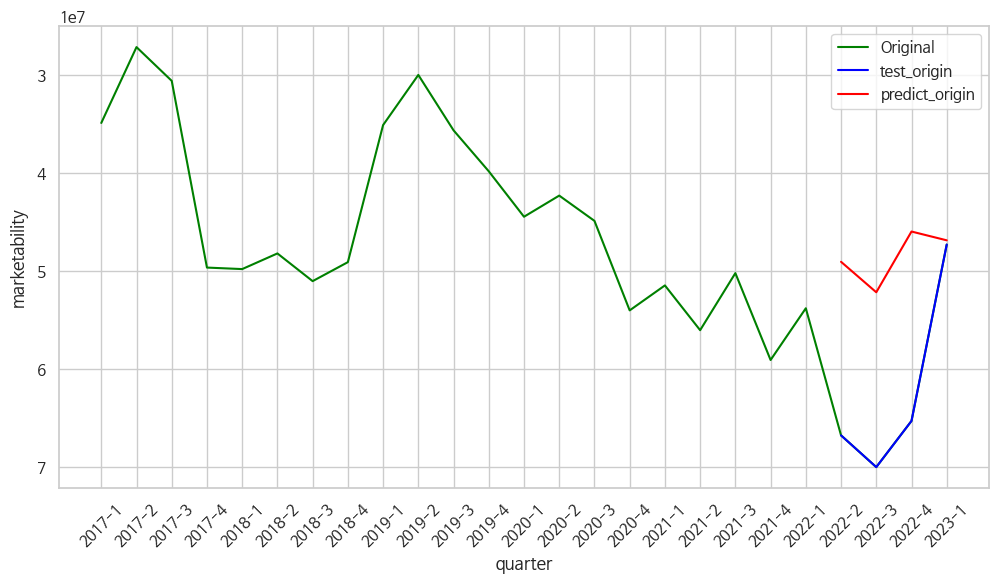

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.381907e+07
std      8.954064e+06
min     -1.931392e+07
25%     -1.820068e+07
50%     -1.776470e+07
75%     -1.338309e+07
max     -4.329560e+05
dtype: float64

In [ ]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 19ms/step
[[0.5239277]]
--------------------------------------------------------------------------------
예측된 시장성  : -47544840.0 


### 순점포증감률

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['분기당_매출_금액', '성장성', '시장성']]
y = ap_jungsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.133573e+09  1.000000 -3.489017e+07
1   2.810539e+09  0.896912 -2.715398e+07
2   2.786129e+09  0.991315 -3.059596e+07
3   2.730475e+09  0.980025 -4.963760e+07
4   2.624546e+09  0.961205 -4.979102e+07
5   2.650086e+09  1.009731 -4.819539e+07
6   2.718380e+09  1.025770 -5.101986e+07
7   3.117817e+09  1.146939 -4.908531e+07
8   2.686518e+09  0.861666 -3.510471e+07
9   2.578743e+09  0.959883 -2.999183e+07
10  2.636025e+09  1.022213 -3.564022e+07
11  3.068860e+09  1.164200 -3.981870e+07
12  2.444956e+09  0.796698 -4.445375e+07
13  2.470598e+09  1.010488 -4.229707e+07
14  2.691219e+09  1.089298 -4.487434e+07
15  2.625254e+09  0.975489 -5.400308e+07
16  2.381930e+09  0.907314 -5.145740e+07
17  2.708718e+09  1.137195 -5.602270e+07
18  2.140532e+09  0.790238 -5.020289e+07
19  2.863370e+09  1.337691 -5.906330e+07
20  2.348296e+09  0.820116 -5.378665e+07
21  2.893328e+09  1.232096 -6.674799e+07
22  2.987759e+09  1.032638 -6.998541e+07
23  3.534728e+09

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [ ]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[1.         0.71756338 0.10995252]
 [0.21219571 0.31678172 0.52984849]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4010
Epoch 1: val_loss improved from inf to 0.15218, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.4010 - val_loss: 0.1522
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3996
Epoch 2: val_loss improved from 0.15218 to 0.15144, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.3996 - val_loss: 0.1514
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3981
Epoch 3: val_loss improved from 0.15144 to 0.15070, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.3981 - val_loss: 0.1507
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3967
Epoch 4: val_loss improved from 0.15070 to 0.14996, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.3967 - val_loss: 0.1500
Epoch 5/300
1/1 [================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 688ms/step
[[0.29660502]
 [0.2552855 ]
 [0.25830206]
 [0.26692337]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.531481,0.296605
2022-3,0.388889,0.255286
2022-4,0.239664,0.258302
2023-1,0.254869,0.266923


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_jungsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.531481,0.296605,2.222222,-1.438190,3.660412
2022-3,0.388889,0.255286,0.000000,-2.082131,2.082131
2022-4,0.239664,0.258302,-2.325581,-2.035120,-0.290462
2023-1,0.254869,0.266923,-2.088616,-1.900761,-0.187855


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


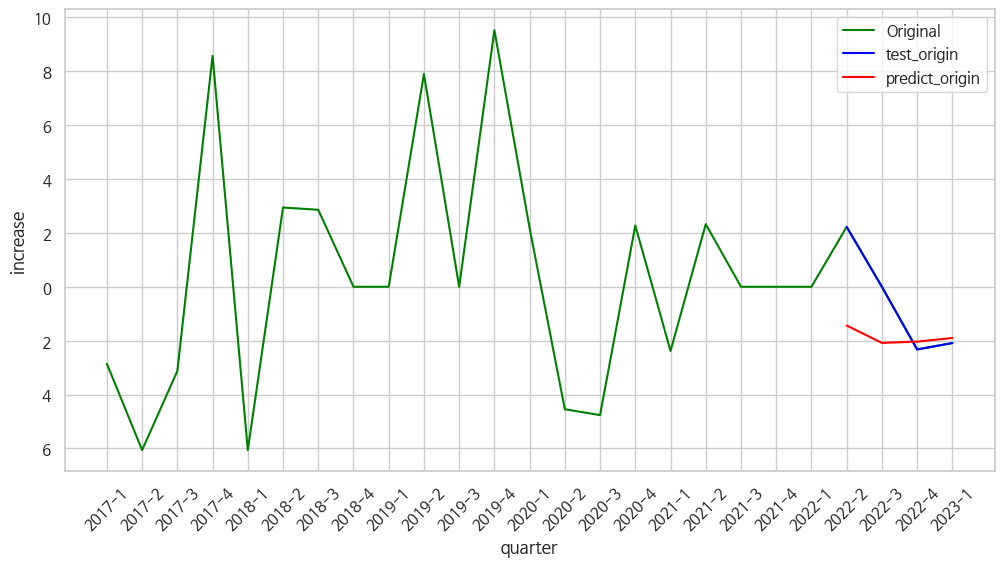

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.316057
std      1.908361
min     -0.290462
25%     -0.213507
50%      0.947138
75%      2.476701
max      3.660412
dtype: float64

In [ ]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 21ms/step
[[0.32242435]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.035810947418213 


### 추가


In [ ]:
ap_jungsik.loc[25] = ['2023-2', '중식음식점', sales, growth, increase, marketability]

<ipython-input-123-8dbc4f4cb48c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_jungsik.loc[25] = ['2023-2', '중식음식점수리리', sales, growth, increase, marketability]


In [ ]:
ap_jungsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,중식음식점,3.133573e+09,1.000000,-2.857143,-3.489017e+07
1,2017-2,중식음식점,2.810539e+09,0.896912,-6.060606,-2.715398e+07
2,2017-3,중식음식점,2.786129e+09,0.991315,-3.125000,-3.059596e+07
3,2017-4,중식음식점,2.730475e+09,0.980025,8.571429,-4.963760e+07
4,2018-1,중식음식점,2.624546e+09,0.961205,-6.060606,-4.979102e+07
5,2018-2,중식음식점,2.650086e+09,1.009731,2.941176,-4.819539e+07
6,2018-3,중식음식점,2.718380e+09,1.025770,2.857143,-5.101986e+07
7,2018-4,중식음식점,3.117817e+09,1.146939,0.000000,-4.908531e+07
8,2019-1,중식음식점,2.686518e+09,0.861666,0.000000,-3.510471e+07
9,2019-2,중식음식점,2.578743e+09,0.959883,7.894737,-2.999183e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [ ]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_jungsik[['성장성', '시장성', '순점포증감률']]
y = ap_jungsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.489017e+07 -2.857143
1   0.896912 -2.715398e+07 -6.060606
2   0.991315 -3.059596e+07 -3.125000
3   0.980025 -4.963760e+07  8.571429
4   0.961205 -4.979102e+07 -6.060606
5   1.009731 -4.819539e+07  2.941176
6   1.025770 -5.101986e+07  2.857143
7   1.146939 -4.908531e+07  0.000000
8   0.861666 -3.510471e+07  0.000000
9   0.959883 -2.999183e+07  7.894737
10  1.022213 -3.564022e+07  0.000000
11  1.164200 -3.981870e+07  9.523810
12  0.796698 -4.445375e+07  2.173913
13  1.010488 -4.229707e+07 -4.545455
14  1.089298 -4.487434e+07 -4.761905
15  0.975489 -5.400308e+07  2.272727
16  0.907314 -5.145740e+07 -2.380952
17  1.137195 -5.602270e+07  2.325581
18  0.790238 -5.020289e+07  0.000000
19  1.337691 -5.906330e+07  0.000000
20  0.820116 -5.378665e+07  0.000000
21  1.232096 -6.674799e+07  2.222222
22  1.032638 -6.998541e+07  0.000000
23  1.183070 -6.527598e+07 -2.325581
24  0.963661 -4.729124e+07 -2.088616
25  0.955280 -4.754484e+07 -1.035811
-

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.31678172 0.52984849 0.25486934]
 [0.3014723  0.5239276  0.32242435]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2162
Epoch 1: val_loss improved from inf to 0.14751, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2162 - val_loss: 0.1475
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2151
Epoch 2: val_loss improved from 0.14751 to 0.14678, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.2151 - val_loss: 0.1468
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2140
Epoch 3: val_loss improved from 0.14678 to 0.14606, saving model to stock_model.h5
1/1 [==============================] - 0s 115ms/step - loss: 0.2140 - val_loss: 0.1461
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2129
Epoch 4: val_loss improved from 0.14606 to 0.14534, saving model to stock_model.h5
1/1 [==============================] - 0s 112ms/step - loss: 0.2129 - val_loss: 0.1453
Epoch 5/300
1/1 [==============

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 937ms/step
[[0.2962112 ]
 [0.30481046]
 [0.2636637 ]
 [0.28897667]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.607681,0.296211
2022-4,1.000000,0.304810
2023-1,0.212196,0.263664
2023-2,0.239118,0.288977


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_jungsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.607681,0.296211,2.987759e+09,2.553509e+09,434250342.0
2022-4,1.000000,0.304810,3.534728e+09,2.565498e+09,969230761.0
2023-1,0.212196,0.263664,2.436375e+09,2.508131e+09,-71756288.0
2023-2,0.239118,0.288977,2.473910e+09,2.543422e+09,-69512448.0


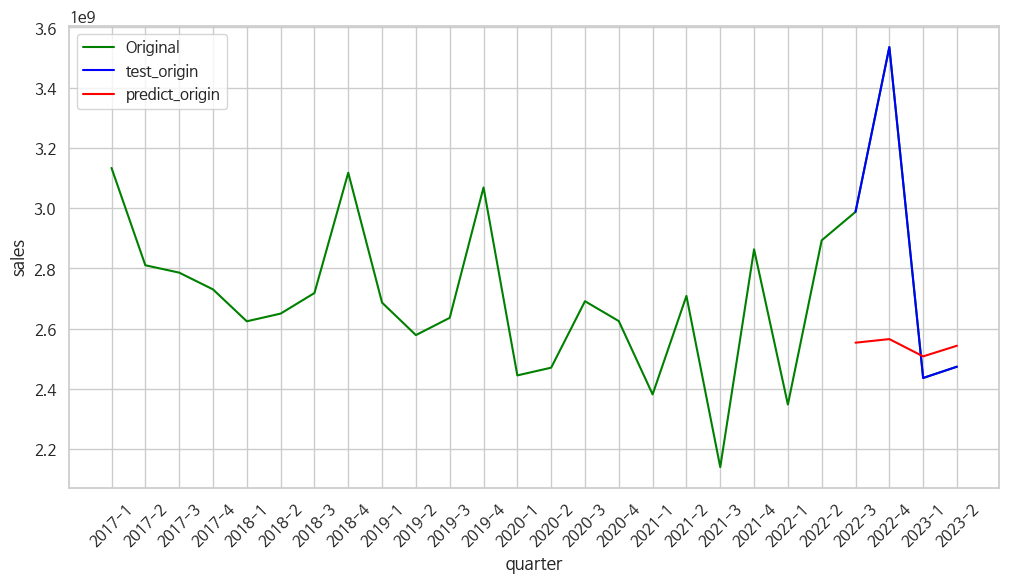

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     3.155531e+08
std      4.965439e+08
min     -7.175629e+07
25%     -7.007341e+07
50%      1.823689e+08
75%      5.679954e+08
max      9.692308e+08
dtype: float64

In [ ]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 25ms/step
[[0.31391108]]
--------------------------------------------------------------------------------
예측된 매출  : 2578185728.0 


### 성장성

In [ ]:
X = ap_jungsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_jungsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   3.133573e+09 -3.489017e+07 -2.857143
1   2.810539e+09 -2.715398e+07 -6.060606
2   2.786129e+09 -3.059596e+07 -3.125000
3   2.730475e+09 -4.963760e+07  8.571429
4   2.624546e+09 -4.979102e+07 -6.060606
5   2.650086e+09 -4.819539e+07  2.941176
6   2.718380e+09 -5.101986e+07  2.857143
7   3.117817e+09 -4.908531e+07  0.000000
8   2.686518e+09 -3.510471e+07  0.000000
9   2.578743e+09 -2.999183e+07  7.894737
10  2.636025e+09 -3.564022e+07  0.000000
11  3.068860e+09 -3.981870e+07  9.523810
12  2.444956e+09 -4.445375e+07  2.173913
13  2.470598e+09 -4.229707e+07 -4.545455
14  2.691219e+09 -4.487434e+07 -4.761905
15  2.625254e+09 -5.400308e+07  2.272727
16  2.381930e+09 -5.145740e+07 -2.380952
17  2.708718e+09 -5.602270e+07  2.325581
18  2.140532e+09 -5.020289e+07  0.000000
19  2.863370e+09 -5.906330e+07  0.000000
20  2.348296e+09 -5.378665e+07  0.000000
21  2.893328e+09 -6.674799e+07  2.222222
22  2.987759e+09 -6.998541e+07  0.000000
23  3.534728e+09

In [ ]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.21219571 0.52984849 0.25486934]
 [0.2391182  0.5239276  0.32242435]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1982
Epoch 1: val_loss improved from inf to 0.33521, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1982 - val_loss: 0.3352
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1971
Epoch 2: val_loss improved from 0.33521 to 0.33423, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.1971 - val_loss: 0.3342
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1961
Epoch 3: val_loss improved from 0.33423 to 0.33325, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.1961 - val_loss: 0.3333
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1950
Epoch 4: val_loss improved from 0.33325 to 0.33228, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1950 - val_loss: 0.3323
Epoch 5/300
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 639ms/step
[[0.28121787]
 [0.29176313]
 [0.28602487]
 [0.3004765 ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.442777,0.281218
2022-4,0.717563,0.291763
2023-1,0.316782,0.286025
2023-2,0.301472,0.300476


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 3].values       # 성장성이 ap_jungsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.442777,0.281218,1.032638,0.944191,0.088446
2022-4,0.717563,0.291763,1.183070,0.949965,0.233106
2023-1,0.316782,0.286025,0.963661,0.946823,0.016838
2023-2,0.301472,0.300476,0.955280,0.954735,0.000545


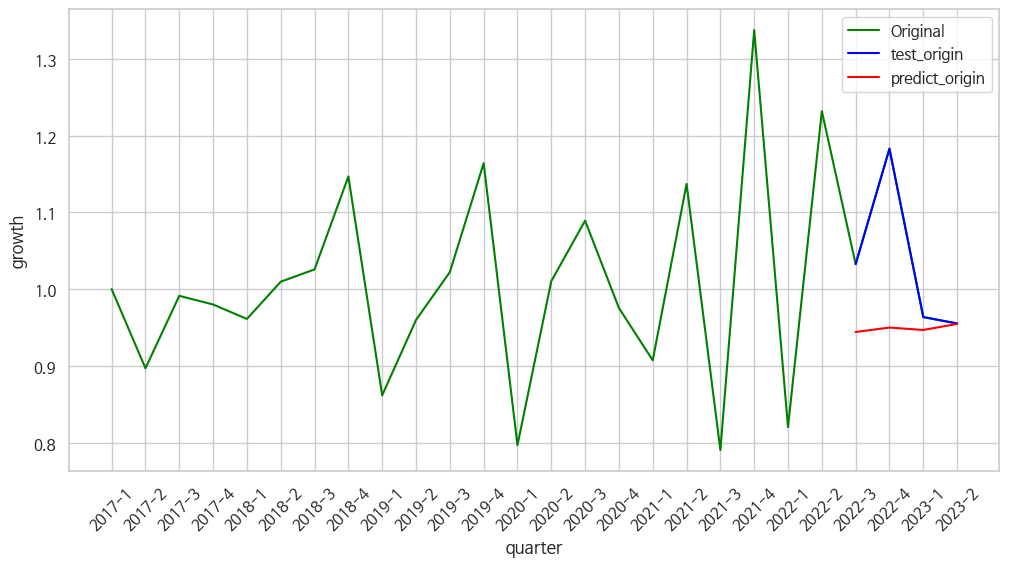

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.084734
std      0.106028
min      0.000545
25%      0.012765
50%      0.052642
75%      0.124611
max      0.233106
dtype: float64

In [ ]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 29ms/step
[[0.28180712]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9445140361785889 


### 시장성

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_jungsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   3.133573e+09  1.000000 -2.857143
1   2.810539e+09  0.896912 -6.060606
2   2.786129e+09  0.991315 -3.125000
3   2.730475e+09  0.980025  8.571429
4   2.624546e+09  0.961205 -6.060606
5   2.650086e+09  1.009731  2.941176
6   2.718380e+09  1.025770  2.857143
7   3.117817e+09  1.146939  0.000000
8   2.686518e+09  0.861666  0.000000
9   2.578743e+09  0.959883  7.894737
10  2.636025e+09  1.022213  0.000000
11  3.068860e+09  1.164200  9.523810
12  2.444956e+09  0.796698  2.173913
13  2.470598e+09  1.010488 -4.545455
14  2.691219e+09  1.089298 -4.761905
15  2.625254e+09  0.975489  2.272727
16  2.381930e+09  0.907314 -2.380952
17  2.708718e+09  1.137195  2.325581
18  2.140532e+09  0.790238  0.000000
19  2.863370e+09  1.337691  0.000000
20  2.348296e+09  0.820116  0.000000
21  2.893328e+09  1.232096  2.222222
22  2.987759e+09  1.032638  0.000000
23  3.534728e+09  1.183070 -2.325581
24  2.436375e+09  0.963661 -2.088616
25  2.473910e+09  0.955280 -1.035811
-

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.21219571 0.31678172 0.25486934]
 [0.2391182  0.3014723  0.32242435]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4835
Epoch 1: val_loss improved from inf to 0.16465, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.4835 - val_loss: 0.1647
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4819
Epoch 2: val_loss improved from 0.16465 to 0.16391, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.4819 - val_loss: 0.1639
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4804
Epoch 3: val_loss improved from 0.16391 to 0.16318, saving model to stock_model.h5
1/1 [==============================] - 0s 109ms/step - loss: 0.4804 - val_loss: 0.1632
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4789
Epoch 4: val_loss improved from 0.16318 to 0.16244, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.4789 - val_loss: 0.1624
Epoch 5/300
1/1 [===============

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 628ms/step
[[0.35078335]
 [0.46279088]
 [0.44579053]
 [0.43020838]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.000000,0.350783
2022-4,0.109953,0.462791
2023-1,0.529848,0.445791
2023-2,0.523928,0.430208


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 5].values       # 시장성이 ap_jungsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.000000,0.350783,-6.998541e+07,-54960856.0,-1.502455e+07
2022-4,0.109953,0.462791,-6.527598e+07,-50163412.0,-1.511257e+07
2023-1,0.529848,0.445791,-4.729124e+07,-50891564.0,3.600324e+06
2023-2,0.523928,0.430208,-4.754484e+07,-51558968.0,4.014128e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


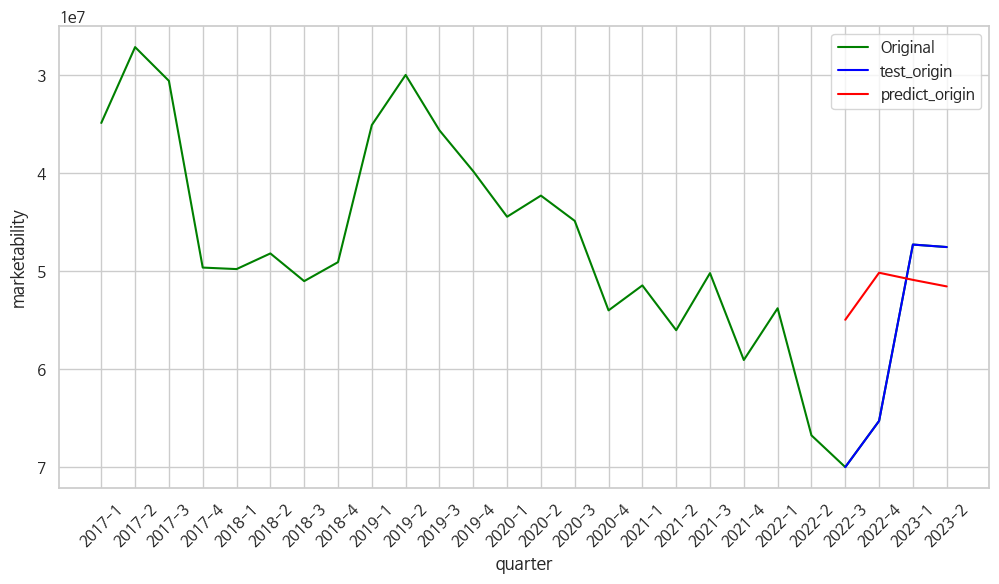

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -5.630667e+06
std      1.089931e+07
min     -1.511257e+07
25%     -1.504656e+07
50%     -5.712113e+06
75%      3.703775e+06
max      4.014128e+06
dtype: float64

In [ ]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 23ms/step
[[0.30389705]]
--------------------------------------------------------------------------------
예측된 시장성  : -56969060.0 


### 순점포증감률

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['분기당_매출_금액', '성장성', '시장성']]
y = ap_jungsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.133573e+09  1.000000 -3.489017e+07
1   2.810539e+09  0.896912 -2.715398e+07
2   2.786129e+09  0.991315 -3.059596e+07
3   2.730475e+09  0.980025 -4.963760e+07
4   2.624546e+09  0.961205 -4.979102e+07
5   2.650086e+09  1.009731 -4.819539e+07
6   2.718380e+09  1.025770 -5.101986e+07
7   3.117817e+09  1.146939 -4.908531e+07
8   2.686518e+09  0.861666 -3.510471e+07
9   2.578743e+09  0.959883 -2.999183e+07
10  2.636025e+09  1.022213 -3.564022e+07
11  3.068860e+09  1.164200 -3.981870e+07
12  2.444956e+09  0.796698 -4.445375e+07
13  2.470598e+09  1.010488 -4.229707e+07
14  2.691219e+09  1.089298 -4.487434e+07
15  2.625254e+09  0.975489 -5.400308e+07
16  2.381930e+09  0.907314 -5.145740e+07
17  2.708718e+09  1.137195 -5.602270e+07
18  2.140532e+09  0.790238 -5.020289e+07
19  2.863370e+09  1.337691 -5.906330e+07
20  2.348296e+09  0.820116 -5.378665e+07
21  2.893328e+09  1.232096 -6.674799e+07
22  2.987759e+09  1.032638 -6.998541e+07
23  3.534728e+09

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.21219571 0.31678172 0.52984849]
 [0.2391182  0.3014723  0.5239276 ]]


In [ ]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3688
Epoch 1: val_loss improved from inf to 0.18961, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.3688 - val_loss: 0.1896
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3675
Epoch 2: val_loss improved from 0.18961 to 0.18875, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.3675 - val_loss: 0.1888
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3662
Epoch 3: val_loss improved from 0.18875 to 0.18790, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.3662 - val_loss: 0.1879
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3649
Epoch 4: val_loss improved from 0.18790 to 0.18705, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3649 - val_loss: 0.1870
Epoch 5/300
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 673ms/step
[[0.3168483 ]
 [0.3240265 ]
 [0.33269548]
 [0.404792  ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.388889,0.316848
2022-4,0.239664,0.324026
2023-1,0.254869,0.332695
2023-2,0.322424,0.404792


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_jungsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.388889,0.316848,0.000000,-1.122710,1.122710
2022-4,0.239664,0.324026,-2.325581,-1.010842,-1.314739
2023-1,0.254869,0.332695,-2.088616,-0.875741,-1.212875
2023-2,0.322424,0.404792,-1.035811,0.247841,-1.283652


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


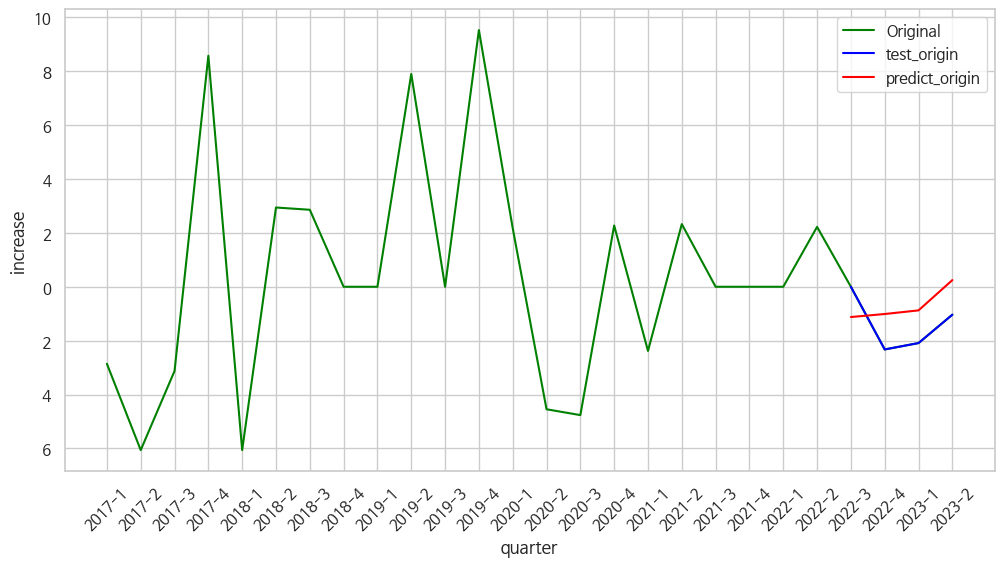

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.672139
std      1.197325
min     -1.314739
25%     -1.291424
50%     -1.248263
75%     -0.628979
max      1.122710
dtype: float64

In [ ]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 32ms/step
[[0.3859651]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.0455654039978981 


### 추가

In [ ]:
ap_jungsik.loc[26] = ['2023-3', '중식음식점', sales, growth, increase, marketability]

<ipython-input-173-be6d3f1663d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_jungsik.loc[26] = ['2023-3', '중식음식점', sales, growth, increase, marketability]


In [ ]:
ap_jungsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,중식음식점,3.133573e+09,1.000000,-2.857143,-3.489017e+07
1,2017-2,중식음식점,2.810539e+09,0.896912,-6.060606,-2.715398e+07
2,2017-3,중식음식점,2.786129e+09,0.991315,-3.125000,-3.059596e+07
3,2017-4,중식음식점,2.730475e+09,0.980025,8.571429,-4.963760e+07
4,2018-1,중식음식점,2.624546e+09,0.961205,-6.060606,-4.979102e+07
5,2018-2,중식음식점,2.650086e+09,1.009731,2.941176,-4.819539e+07
6,2018-3,중식음식점,2.718380e+09,1.025770,2.857143,-5.101986e+07
7,2018-4,중식음식점,3.117817e+09,1.146939,0.000000,-4.908531e+07
8,2019-1,중식음식점,2.686518e+09,0.861666,0.000000,-3.510471e+07
9,2019-2,중식음식점,2.578743e+09,0.959883,7.894737,-2.999183e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['성장성', '시장성', '순점포증감률']]
y = ap_jungsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.489017e+07 -2.857143
1   0.896912 -2.715398e+07 -6.060606
2   0.991315 -3.059596e+07 -3.125000
3   0.980025 -4.963760e+07  8.571429
4   0.961205 -4.979102e+07 -6.060606
5   1.009731 -4.819539e+07  2.941176
6   1.025770 -5.101986e+07  2.857143
7   1.146939 -4.908531e+07  0.000000
8   0.861666 -3.510471e+07  0.000000
9   0.959883 -2.999183e+07  7.894737
10  1.022213 -3.564022e+07  0.000000
11  1.164200 -3.981870e+07  9.523810
12  0.796698 -4.445375e+07  2.173913
13  1.010488 -4.229707e+07 -4.545455
14  1.089298 -4.487434e+07 -4.761905
15  0.975489 -5.400308e+07  2.272727
16  0.907314 -5.145740e+07 -2.380952
17  1.137195 -5.602270e+07  2.325581
18  0.790238 -5.020289e+07  0.000000
19  1.337691 -5.906330e+07  0.000000
20  0.820116 -5.378665e+07  0.000000
21  1.232096 -6.674799e+07  2.222222
22  1.032638 -6.998541e+07  0.000000
23  1.183070 -6.527598e+07 -2.325581
24  0.963661 -4.729124e+07 -2.088616
25  0.955280 -4.754484e+07 -1.035811
2

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.3014723  0.5239276  0.32242435]
 [0.28180707 0.3038971  0.38596511]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2162
Epoch 1: val_loss improved from inf to 0.17445, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2162 - val_loss: 0.1744
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2151
Epoch 2: val_loss improved from 0.17445 to 0.17366, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2151 - val_loss: 0.1737
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2140
Epoch 3: val_loss improved from 0.17366 to 0.17288, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2140 - val_loss: 0.1729
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2129
Epoch 4: val_loss improved from 0.17288 to 0.17211, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2129 - val_loss: 0.1721
Epoch 5/300
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 653ms/step
[[0.31504625]
 [0.2728585 ]
 [0.29981926]
 [0.32666022]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,1.000000,0.315046
2023-1,0.212196,0.272859
2023-2,0.239118,0.299819
2023-3,0.313911,0.326660


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_jungsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,1.000000,0.315046,3.534728e+09,2.579768e+09,954960041.0
2023-1,0.212196,0.272859,2.436375e+09,2.520950e+09,-84575744.0
2023-2,0.239118,0.299819,2.473910e+09,2.558539e+09,-84629248.0
2023-3,0.313911,0.326660,2.578186e+09,2.595960e+09,-17774592.0


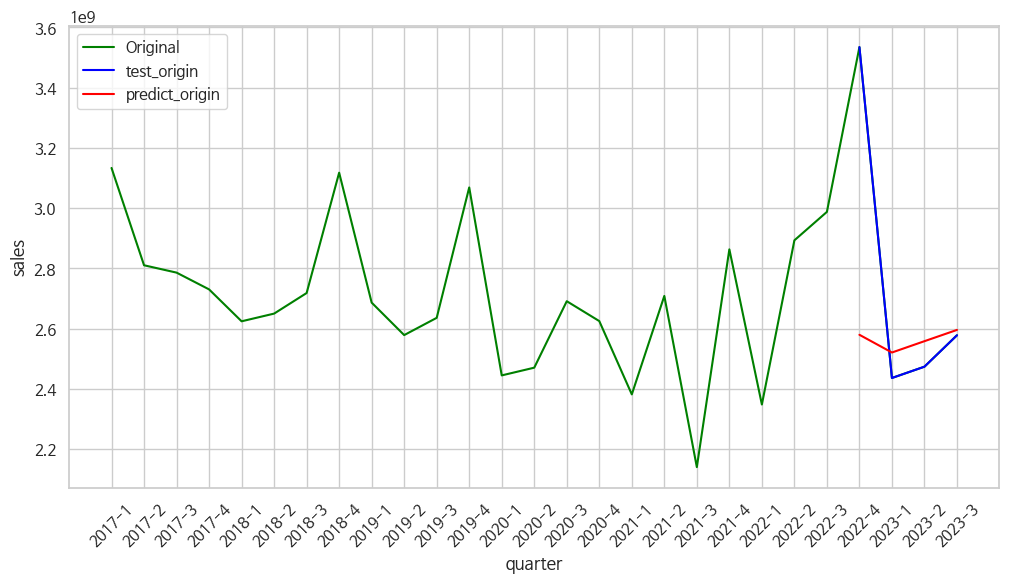

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.919951e+08
std      5.096179e+08
min     -8.462925e+07
25%     -8.458912e+07
50%     -5.117517e+07
75%      2.254091e+08
max      9.549600e+08
dtype: float64

In [ ]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 21ms/step
[[0.32225952]]
--------------------------------------------------------------------------------
예측된 매출  : 2589825024.0 


### 성장성

In [ ]:
X = ap_jungsik[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_jungsik.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   3.133573e+09 -3.489017e+07 -2.857143
1   2.810539e+09 -2.715398e+07 -6.060606
2   2.786129e+09 -3.059596e+07 -3.125000
3   2.730475e+09 -4.963760e+07  8.571429
4   2.624546e+09 -4.979102e+07 -6.060606
5   2.650086e+09 -4.819539e+07  2.941176
6   2.718380e+09 -5.101986e+07  2.857143
7   3.117817e+09 -4.908531e+07  0.000000
8   2.686518e+09 -3.510471e+07  0.000000
9   2.578743e+09 -2.999183e+07  7.894737
10  2.636025e+09 -3.564022e+07  0.000000
11  3.068860e+09 -3.981870e+07  9.523810
12  2.444956e+09 -4.445375e+07  2.173913
13  2.470598e+09 -4.229707e+07 -4.545455
14  2.691219e+09 -4.487434e+07 -4.761905
15  2.625254e+09 -5.400308e+07  2.272727
16  2.381930e+09 -5.145740e+07 -2.380952
17  2.708718e+09 -5.602270e+07  2.325581
18  2.140532e+09 -5.020289e+07  0.000000
19  2.863370e+09 -5.906330e+07  0.000000
20  2.348296e+09 -5.378665e+07  0.000000
21  2.893328e+09 -6.674799e+07  2.222222
22  2.987759e+09 -6.998541e+07  0.000000
23  3.534728e+09

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.2391182  0.5239276  0.32242435]
 [0.31391109 0.3038971  0.38596511]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1982
Epoch 1: val_loss improved from inf to 0.32137, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1982 - val_loss: 0.3214
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1971
Epoch 2: val_loss improved from 0.32137 to 0.32040, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.1971 - val_loss: 0.3204
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1961
Epoch 3: val_loss improved from 0.32040 to 0.31943, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1961 - val_loss: 0.3194
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1950
Epoch 4: val_loss improved from 0.31943 to 0.31847, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.1950 - val_loss: 0.3185
Epoch 5/300
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 927ms/step
[[0.29176313]
 [0.28602487]
 [0.3004765 ]
 [0.28180712]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.717563,0.291763
2023-1,0.316782,0.286025
2023-2,0.301472,0.300476
2023-3,0.281807,0.281807


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 3].values       # 성장성이 ap_jungsik의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.717563,0.291763,1.183070,0.949965,0.233106
2023-1,0.316782,0.286025,0.963661,0.946823,0.016838
2023-2,0.301472,0.300476,0.955280,0.954735,0.000545
2023-3,0.281807,0.281807,0.944514,0.944514,0.000000


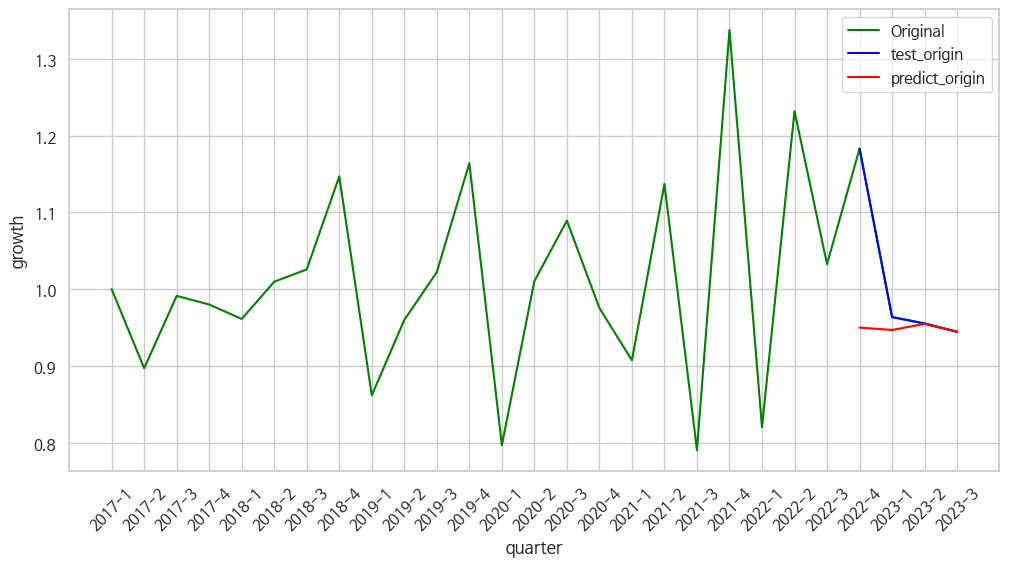

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.062622
std      0.113924
min      0.000000
25%      0.000409
50%      0.008692
75%      0.070905
max      0.233106
dtype: float64

In [ ]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.28793454]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9478685855865479 


###시장성

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_jungsik.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   3.133573e+09  1.000000 -2.857143
1   2.810539e+09  0.896912 -6.060606
2   2.786129e+09  0.991315 -3.125000
3   2.730475e+09  0.980025  8.571429
4   2.624546e+09  0.961205 -6.060606
5   2.650086e+09  1.009731  2.941176
6   2.718380e+09  1.025770  2.857143
7   3.117817e+09  1.146939  0.000000
8   2.686518e+09  0.861666  0.000000
9   2.578743e+09  0.959883  7.894737
10  2.636025e+09  1.022213  0.000000
11  3.068860e+09  1.164200  9.523810
12  2.444956e+09  0.796698  2.173913
13  2.470598e+09  1.010488 -4.545455
14  2.691219e+09  1.089298 -4.761905
15  2.625254e+09  0.975489  2.272727
16  2.381930e+09  0.907314 -2.380952
17  2.708718e+09  1.137195  2.325581
18  2.140532e+09  0.790238  0.000000
19  2.863370e+09  1.337691  0.000000
20  2.348296e+09  0.820116  0.000000
21  2.893328e+09  1.232096  2.222222
22  2.987759e+09  1.032638  0.000000
23  3.534728e+09  1.183070 -2.325581
24  2.436375e+09  0.963661 -2.088616
25  2.473910e+09  0.955280 -1.035811
2

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.2391182  0.3014723  0.32242435]
 [0.31391109 0.28180707 0.38596511]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.4835
Epoch 1: val_loss improved from inf to 0.14640, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.4835 - val_loss: 0.1464
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.4819
Epoch 2: val_loss improved from 0.14640 to 0.14574, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.4819 - val_loss: 0.1457
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.4804
Epoch 3: val_loss improved from 0.14574 to 0.14508, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.4804 - val_loss: 0.1451
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.4789
Epoch 4: val_loss improved from 0.14508 to 0.14442, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.4789 - val_loss: 0.1444
Epoch 5/300
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 952ms/step
[[0.40882048]
 [0.39455053]
 [0.37991485]
 [0.2719053 ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.109953,0.408820
2023-1,0.529848,0.394551
2023-2,0.523928,0.379915
2023-3,0.303897,0.271905


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 5].values       # 시장성이 ap_jungsik의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.109953,0.408820,-6.527598e+07,-52475044.0,-1.280094e+07
2023-1,0.529848,0.394551,-4.729124e+07,-53086244.0,5.795004e+06
2023-2,0.523928,0.379915,-4.754484e+07,-53713112.0,6.168272e+06
2023-3,0.303897,0.271905,-5.696906e+07,-58339316.0,1.370256e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


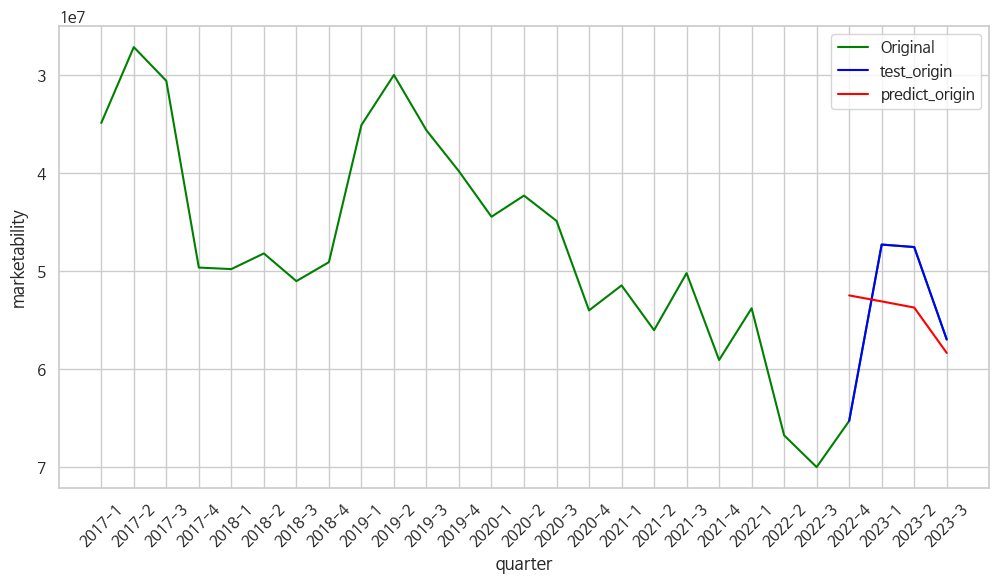

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.331482e+05
std      8.893825e+06
min     -1.280094e+07
25%     -2.172543e+06
50%      3.582630e+06
75%      5.888321e+06
max      6.168272e+06
dtype: float64

In [ ]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.29154763]]
--------------------------------------------------------------------------------
예측된 시장성  : -57498008.0 


### 순점포증감률

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['분기당_매출_금액', '성장성', '시장성']]
y = ap_jungsik.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.133573e+09  1.000000 -3.489017e+07
1   2.810539e+09  0.896912 -2.715398e+07
2   2.786129e+09  0.991315 -3.059596e+07
3   2.730475e+09  0.980025 -4.963760e+07
4   2.624546e+09  0.961205 -4.979102e+07
5   2.650086e+09  1.009731 -4.819539e+07
6   2.718380e+09  1.025770 -5.101986e+07
7   3.117817e+09  1.146939 -4.908531e+07
8   2.686518e+09  0.861666 -3.510471e+07
9   2.578743e+09  0.959883 -2.999183e+07
10  2.636025e+09  1.022213 -3.564022e+07
11  3.068860e+09  1.164200 -3.981870e+07
12  2.444956e+09  0.796698 -4.445375e+07
13  2.470598e+09  1.010488 -4.229707e+07
14  2.691219e+09  1.089298 -4.487434e+07
15  2.625254e+09  0.975489 -5.400308e+07
16  2.381930e+09  0.907314 -5.145740e+07
17  2.708718e+09  1.137195 -5.602270e+07
18  2.140532e+09  0.790238 -5.020289e+07
19  2.863370e+09  1.337691 -5.906330e+07
20  2.348296e+09  0.820116 -5.378665e+07
21  2.893328e+09  1.232096 -6.674799e+07
22  2.987759e+09  1.032638 -6.998541e+07
23  3.534728e+09

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.2391182  0.3014723  0.5239276 ]
 [0.31391109 0.28180707 0.3038971 ]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3688
Epoch 1: val_loss improved from inf to 0.18704, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3688 - val_loss: 0.1870
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3675
Epoch 2: val_loss improved from 0.18704 to 0.18620, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.3675 - val_loss: 0.1862
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3662
Epoch 3: val_loss improved from 0.18620 to 0.18536, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.3662 - val_loss: 0.1854
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3649
Epoch 4: val_loss improved from 0.18536 to 0.18452, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.3649 - val_loss: 0.1845
Epoch 5/300
1/1 [=================

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 630ms/step
[[0.3240265 ]
 [0.33269548]
 [0.404792  ]
 [0.3859651 ]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.239664,0.324026
2023-1,0.254869,0.332695
2023-2,0.322424,0.404792
2023-3,0.385965,0.385965


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_jungsik의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.239664,0.324026,-2.325581,-1.010842,-1.314739
2023-1,0.254869,0.332695,-2.088616,-0.875741,-1.212875
2023-2,0.322424,0.404792,-1.035811,0.247841,-1.283652
2023-3,0.385965,0.385965,-0.045565,-0.045565,0.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


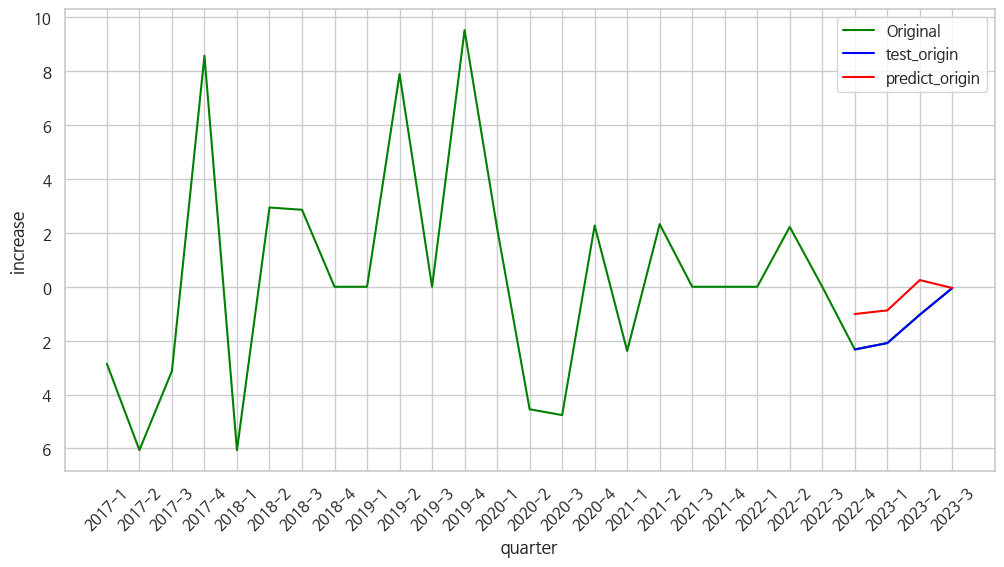

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_jungsik['분기'], ap_jungsik['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [ ]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.952816
std      0.636640
min     -1.314739
25%     -1.291424
50%     -1.248263
75%     -0.909656
max      0.000000
dtype: float64

In [ ]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 25ms/step
[[0.36730903]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -0.33630940318107605 


### 추가

In [ ]:
ap_jungsik.loc[27] = ['2023-4', '중식음식점', sales, growth, increase, marketability]

<ipython-input-223-32930c17a940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_jungsik.loc[27] = ['2023-4', '중식음식점', sales, growth, increase, marketability]


In [ ]:
final_ap_jungsik = ap_jungsik
final_ap_jungsik

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,중식음식점,3.133573e+09,1.000000,-2.857143,-3.489017e+07
1,2017-2,중식음식점,2.810539e+09,0.896912,-6.060606,-2.715398e+07
2,2017-3,중식음식점,2.786129e+09,0.991315,-3.125000,-3.059596e+07
3,2017-4,중식음식점,2.730475e+09,0.980025,8.571429,-4.963760e+07
4,2018-1,중식음식점,2.624546e+09,0.961205,-6.060606,-4.979102e+07
5,2018-2,중식음식점,2.650086e+09,1.009731,2.941176,-4.819539e+07
6,2018-3,중식음식점,2.718380e+09,1.025770,2.857143,-5.101986e+07
7,2018-4,중식음식점,3.117817e+09,1.146939,0.000000,-4.908531e+07
8,2019-1,중식음식점,2.686518e+09,0.861666,0.000000,-3.510471e+07
9,2019-2,중식음식점,2.578743e+09,0.959883,7.894737,-2.999183e+07


In [ ]:
2023_sales = 2.436375e+09+2.473910e+09+2.578186e+09	+2.589825e+09

## 최종결과

In [ ]:
### X / y 데이터 생성
X = ap_jungsik[['성장성', '시장성', '순점포증감률']]
y = ap_jungsik.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -3.489017e+07 -2.857143
1   0.896912 -2.715398e+07 -6.060606
2   0.991315 -3.059596e+07 -3.125000
3   0.980025 -4.963760e+07  8.571429
4   0.961205 -4.979102e+07 -6.060606
5   1.009731 -4.819539e+07  2.941176
6   1.025770 -5.101986e+07  2.857143
7   1.146939 -4.908531e+07  0.000000
8   0.861666 -3.510471e+07  0.000000
9   0.959883 -2.999183e+07  7.894737
10  1.022213 -3.564022e+07  0.000000
11  1.164200 -3.981870e+07  9.523810
12  0.796698 -4.445375e+07  2.173913
13  1.010488 -4.229707e+07 -4.545455
14  1.089298 -4.487434e+07 -4.761905
15  0.975489 -5.400308e+07  2.272727
16  0.907314 -5.145740e+07 -2.380952
17  1.137195 -5.602270e+07  2.325581
18  0.790238 -5.020289e+07  0.000000
19  1.337691 -5.906330e+07  0.000000
20  0.820116 -5.378665e+07  0.000000
21  1.232096 -6.674799e+07  2.222222
22  1.032638 -6.998541e+07  0.000000
23  1.183070 -6.527598e+07 -2.325581
24  0.963661 -4.729124e+07 -2.088616
25  0.955280 -4.754484e+07 -1.035811
2

In [ ]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [ ]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.28180707 0.3038971  0.38596511]
 [0.28793462 0.29154757 0.36730904]]


In [ ]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [ ]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2135
Epoch 1: val_loss improved from inf to 0.26795, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2135 - val_loss: 0.2679
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2124
Epoch 2: val_loss improved from 0.26795 to 0.26705, saving model to stock_model.h5
1/1 [==============================] - 0s 120ms/step - loss: 0.2124 - val_loss: 0.2671
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2113
Epoch 3: val_loss improved from 0.26705 to 0.26616, saving model to stock_model.h5
1/1 [==============================] - 0s 108ms/step - loss: 0.2113 - val_loss: 0.2662
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2102
Epoch 4: val_loss improved from 0.26616 to 0.26526, saving model to stock_model.h5
1/1 [==============================] - 0s 99ms/step - loss: 0.2102 - val_loss: 0.2653
Epoch 5/300
1/1 [===============

In [ ]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 851ms/step
[[0.27375185]
 [0.29842094]
 [0.3274073 ]
 [0.32419252]]


In [ ]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_jungsik.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.212196,0.273752
2023-2,0.239118,0.298421
2023-3,0.313911,0.327407
2023-4,0.322259,0.324193


In [ ]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_jungsik.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_jungsik의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.212196,0.273752,2.436375e+09,2.522196e+09,-85821440.0
2023-2,0.239118,0.298421,2.473910e+09,2.556589e+09,-82679552.0
2023-3,0.313911,0.327407,2.578186e+09,2.597002e+09,-18816256.0
2023-4,0.322259,0.324193,2.589825e+09,2.592520e+09,-2695168.0


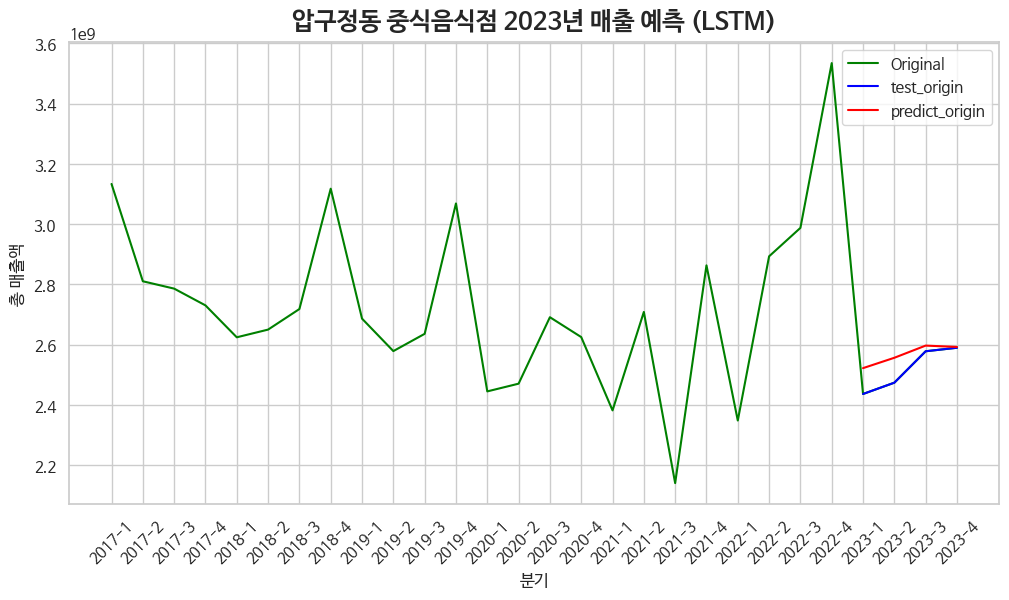

In [ ]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 중식음식점 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_jungsik['분기'], ap_jungsik['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['prsedict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()s